## Imports

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
%matplotlib inline

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Problem 1: Linear Algebra Review

### Part 1: Traces
Compute Trace(A).

In [2]:
A = [[1,2],[5,-2]] #Defines matrix A
B = [[1,0,0],[2,0,2]] #Defines matrix B 


print('The trace for A is: %i \nThe trace for B is: %i.' %((np.trace(A)), (np.trace(B)))) #Print statement for both 

The trace for A is: -1 
The trace for B is: 1.


### Part 2
Compute Trace(BB<sup>T</sup>)

In [3]:
print('The trace for BB^T is: %i' %(np.trace((B@np.transpose(B))))) #Finds the trace of BB^T

The trace for BB^T is: 9


## Problem 2: Linear Algebra Review

Let A ∈R<sup>n×n</sup>, D ∈R<sup>n×n</sup>, b ∈Rn, and x<sup>T</sup> (A + D) = b<sup>T</sup> . Use the matrix inverse to solve
for x and simplify. Assume that det (A + D) ̸= 0.

## Problem 3: Linear Alegebra Review 

Let matrix A ∈R<sup>n×n</sup> and matrix B ∈R<sup>n×m</sup>, where n ̸= m.

In [4]:
def mat_props(n: int, m: int) -> None:
    """
    Multiplies two matrices A and B of dimensions n x n and n x m, respectively, and prints the results
    of both multiplications as a string.

    Args:
    - n: an integer indicating the dimension of the square matrix A and the number of rows in matrix B.
    - m: an integer indicating the number of columns in matrix B.

    Returns:
    - None
    """
    # Create matrix A with shape n x n
    A = np.random.rand(n, n)
    
    # Create matrix B with shape n x m
    B = np.random.rand(n, m)
    
    # Multiply A x B
    try:
        AB = np.dot(A, B)
        AB= 'Possible'
    except ValueError:
        AB = 'Not Possible'
    
    # Multiply B x A
    try:
        BA = np.dot(B, A)
    except ValueError:
        BA = 'Not Possible'
    
    # Print the results as a string
    print('The product of A x B is %s\nThe product of B x A is %s' %(AB, BA))


In [34]:
#Calls the matrix properties function 
mat_props(2,4)

The product of A x B is Possible
The product of B x A is Not Possible


### Part 1: 
If it is possible to compute the matrix product AB, give the size of the matrix produced.
Otherwise, write, ‘Not possible.’ <br>

<b> It is posisble</b>

### Part 2:

If it is possible to compute the matrix product BA, give the size of the matrix produced.
Otherwise, write, ‘Not possible.’ <br>

<b> It is not possible</b>

## Problem 4 Regression


Tastes in music have gradually changed over the years. Based on this observation, our goal is to predict the year of a song based on its timbre summary features. This dataset is from the 2011 Million Song Challenge dataset: https://labrosa.ee.columbia.edu/ millionsong/ <br>

To establish a baseline, we wish to build a linear model that predicts the year. Given an input x ∈ R90, we want to find parameters for a model yˆ = round (f (x)) that predicts the year, where y ∈ Z. <br>


We are going to explore three shallow (linear) neural network models with different acti- vation functions for this task. <br>


To evaluate the model, you must round the output of your linear neural network. You then compute the mean squared error.<br>



### Part 1: Loading and Exploring the Data


Download the music year classification dataset music-dataset.txt at https://archive.
ics.uci.edu/ml/datasets/yearpredictionmsd. Each row is an instance. The first value
is the target to be predicted (a year), and the remaining 90 values in a row are all input
features. Split the dataset into train and test partitions by treating the first 463,714 exam-
ples as the train set and the remaining examples as the test set. The first 12 dimensions
are the average timbre and the remaining 78 are the timbre covariance in the song.<br>
<br>Write a function to load the dataset, e.g.,
trainYears, trainFeat, testYears, testFeat = loadMusicData(fname, addBias) where
trainYears has the years for the training data, trainFeat has the features, etc. addBias
appends a ‘1’ to your feature vectors. Each of the returned variables should be NumPy
arrays.<br>
<br>Write a function mse = musicMSE(pred, gt) where the inputs are the predicted year and
the “ground truth” year from the dataset. The function computes the mean squared error
(MSE) by rounding pred before computing the MSE.<br>
<br>Load the dataset and discuss its properties. What is the range of the variables? How might
you normalize them? What years are represented in the dataset?<br>
<br>What will the test mean squared error (MSE) be if your classifier always outputs the most
common year in the dataset?<br>


In [6]:
def loadMusicData(filename: str, add_bias: bool = True) -> tuple:
    """Loads music data from a file and returns training and testing data.

    Args:
        filename (str): The name of the file containing the music data.
        add_bias (bool, optional): Whether or not to add a bias term to the feature vectors. Defaults to True.

    Returns:
        tuple: A tuple containing the training years, training features, testing years, and testing features.
    """
    with open(filename, "r") as file:
        data = file.readlines()

    # Parse the data
    data_new = [row.strip().split(",") for row in data]
    
    # Split into training and testing data
    training_data = np.array(data_new[:463714])
    testing_data = np.array(data_new[463714:])
    
    # Split features and labels
    train_years, test_years = training_data[:,0].astype(int).reshape(-1,1),testing_data[:,0].astype(int).reshape(-1,1)
    train_features,test_features = training_data[:,1:].astype(float),testing_data[:,1:].astype(float)
  

    # Add the bias term to the features if requested
    if add_bias:
        train_features = np.append(np.ones([len(train_features),1]), train_features, 1)
        test_features = np.append(np.ones([len(test_features),1]), test_features, 1)

    return train_years, train_features, test_years, test_features

In [7]:
def musicMSE(predictions: np.ndarray, ground_truths: np.ndarray) -> float:
    """
    This function calculates the Mean Squared Error (MSE) between the predicted and ground truth music data.
    It takes two input numpy arrays, `predictions` and `ground_truths`, and returns the calculated MSE value.

    Args:
    - predictions: A numpy array of predicted music data
    - ground_truths: A numpy array of ground truth music data

    Returns:
    - A float value representing the calculated MSE
    """

    # Round the predicted music data to the nearest integer value
    rounded_predictions = np.rint(predictions)

    # Calculate the MSE between the rounded predictions and ground truth music data
    mse = np.square(rounded_predictions - ground_truths).mean()

    return mse

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def dataset_assessment(train_years, train_feat, test_years, test_feat):
    """
    This function assesses the given dataset by printing statistics and generating a histogram of the label years.
    It also calculates the test set MSE for two simple baselines: always predicting the most frequent year, and always predicting 1998.
    
    Args:
    train_years: numpy array of shape (num_train_samples, 1) representing the label years of the training set
    train_feat: numpy array of shape (num_train_samples, num_features) representing the features of the training set
    test_years: numpy array of shape (num_test_samples, 1) representing the label years of the test set
    test_feat: numpy array of shape (num_test_samples, num_features) representing the features of the test set
    
    Returns:
    None
    """
    
    # Concatenate all features and print their range
    all_feat = np.concatenate([train_feat, test_feat])
    print("Range of feature variables: %s ~ %s" % (np.min(all_feat), np.max(all_feat)))
    
    # Concatenate all labels and print the sorted collection of years
    all_years = np.concatenate([train_years, test_years])
    unique_years = np.unique(all_years.flatten())
    print("Year collection:", sorted(unique_years))
    
    # Plot a histogram of the label years for the training and test sets
    plt.figure(dpi=400)
    plt.hist(train_years.flatten(), label="Training label")
    plt.hist(test_years.flatten(), label="Testing label")
    plt.legend()
    plt.title("Histogram for Training and Testing dataset Year label")
    plt.show()
    
    # Calculate the test set MSE for two simple baselines: always predicting the most frequent year, and always predicting 1998
    most_freq_year = np.argmax(np.bincount(all_years.flatten()))
    print("If the classifier always outputs the most common year %s in the dataset, the test set MSE = %s" % (most_freq_year, musicMSE(most_freq_year, test_years)))
    print("If the classifier always outputs the year 1998 in the dataset, the test set MSE = %s" % musicMSE(1998, test_years))


Range of feature variables: -14861.69535 ~ 65735.77953
Year collection: [1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]


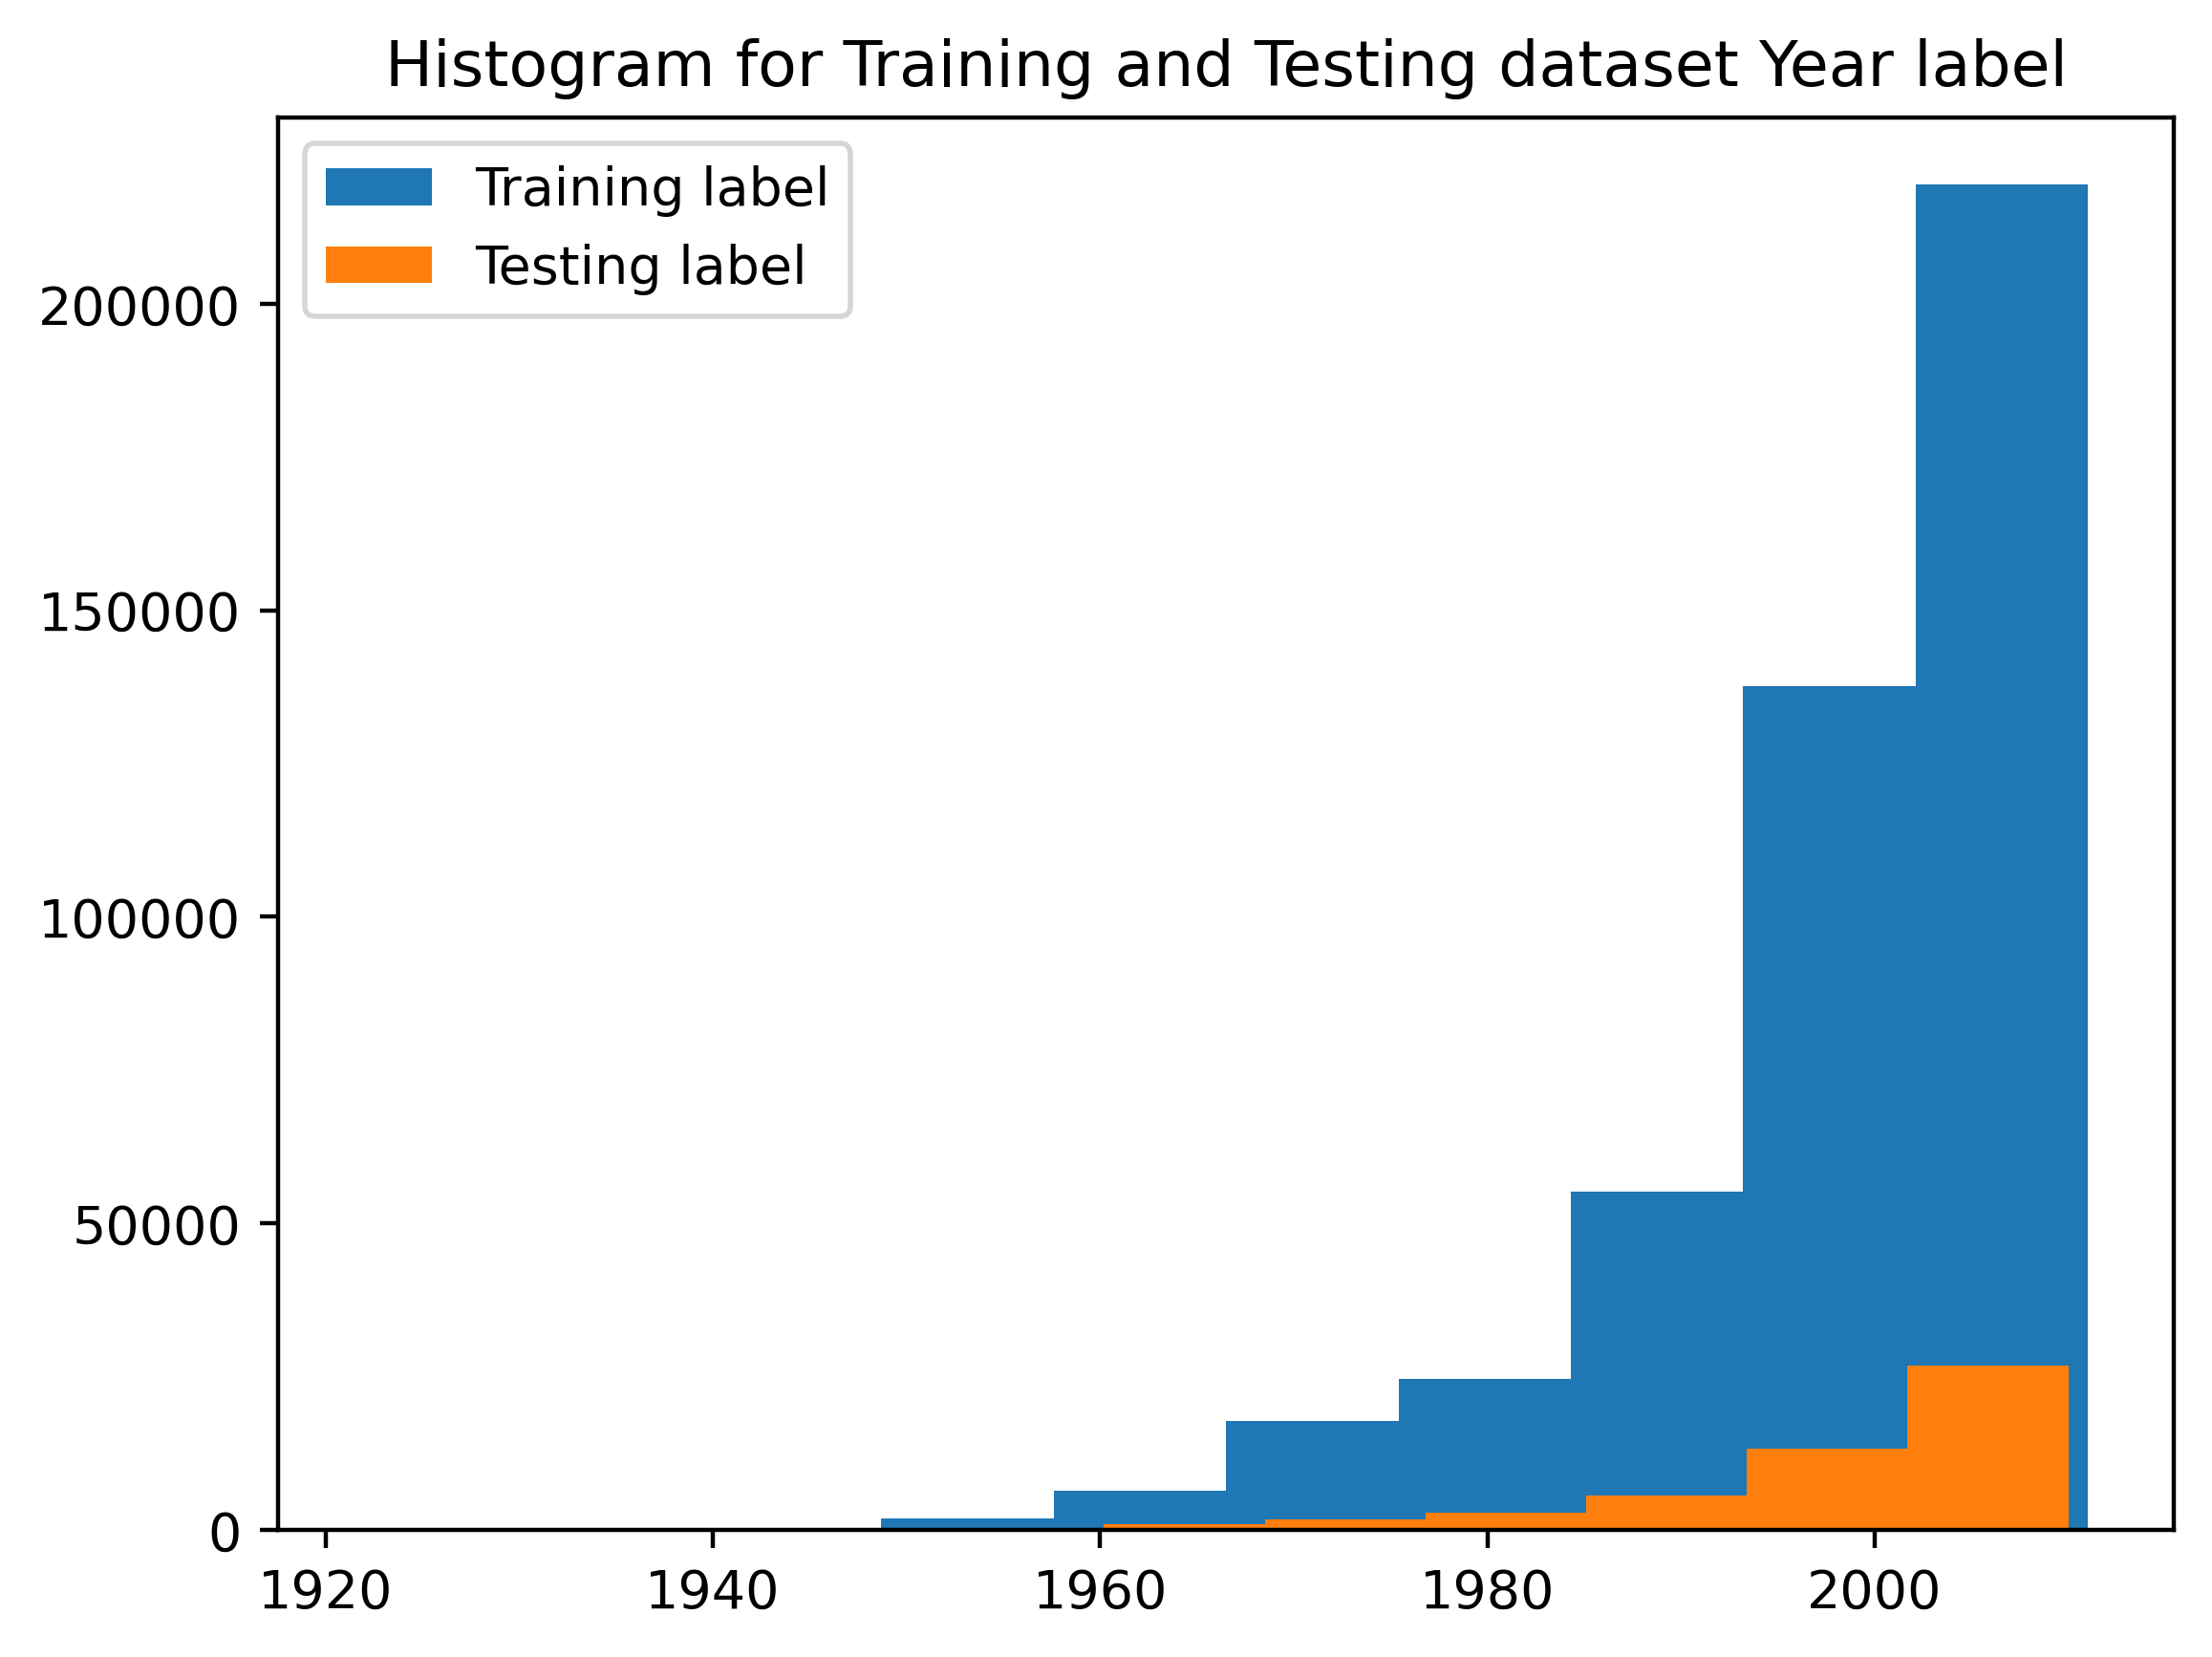

If the classifier always outputs the most common year 2007 in the dataset, the test set MSE = 190.08239236117836
If the classifier always outputs the year 1998 in the dataset, the test set MSE = 118.0090062171951


In [9]:
trainYears, trainFeat, testYears, testFeat = loadMusicData("/Users/wdaugherty/Cornell_Tech_DL/CS-5787/HW2/data/YearPredictionMSD.txt",
add_bias = True)
dataset_assessment(trainYears, trainFeat, testYears, testFeat)

### Part 2: Classification

This problem could have been posed as a classification problem by treating each year as
a category. What would be the problems with this approach? Support your argument by
analyzing a bar chart with the year as the x-axis and the number of examples for that year
as the y-axis.

<b>Solution: </br>

### Part 3: Implementing Ridge (Tikhonov) Regression

<i>Please read the entire assignment. If you write your code correctly you do not need to
implement stochastic gradient descent with mini-batches multiple times. You can implement
it once in a function, then you just specify the input features, target values, weight decay
factor, the loss type (L2, count, or cross-entropy), form of weight decay (none, L2, or L1),
and whether to use momentum or not (momentum is used a later problem). It is up to
you, but you can make the assignment much easier by doing this.</i><br>
<br>Implement stochastic gradient descent with mini-batches to minimize the loss and evaluate
the train and test MSE.<br>
<br>Tune the learning rate and weight decay factor. Subsequently, show the train and test loss
as a function of epochs, where the number of epochs should be chosen to ensure the train
loss is minimized.<br>
<br>This problem can be solved directly using the pseudoinverse. Let X = [x1,x2,...,xN ] and
y = [y1,y2,...,yN ]T , then the pseudoinverse solution is given by:<br>
<br>w = (XX<sup>T</sup> + αI)<sup>−1</sup> Xy.<br>
<br>Compare both solutions.<br>
<br><b>Tip:</b> Debug your models by using an initial training set that only has about 100 examples
and make sure your train loss is going down.<br>
<br><b>Tip:</b> If you don’t use a constant (bias), things will go very bad. If you don’t normalize
your features by ‘z-score’ normalization of your data then things will go very badly. This
means you should compute the training mean across feature dimensions and the training
standard deviation, then normalize by subtracting the training mean from both the train
and test sets, and dividing both sets by the training standard deviation.

In [10]:
class RidgeRegression:
    def __init__(self,learning_rate=0.01, epochs = 1000, batch_size = 1, alpha = 0):
        self.n = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = alpha
    def predict(self,X):
        return X.dot(self.weight.T )
    def fit(self, X, Y, X_test, Y_test):
        np.random.seed(1)
        self.n = X.shape[0]
        self.weight = np.random.normal(0, 0.01,(Y.shape[1], X.shape[1]-1))
        self.weight = np.insert( self.weight,0,0).reshape(1, X.shape[1])
        self.train_loss = []
        self.test_loss =[]
        self.delta_w = np.zeros((Y.shape[1], X.shape[1]))
        for loop in range(self.epochs):
            batches = create_mini_batches(X, Y, self.batch_size)
            for i in range(len(batches)-1):
                batch  = batches[i]
                cur_x = batch[0]
                cur_y = batch[1]
                predicted = self.predict(cur_x)
                self.delta_w =  ( - ( 2 * ( cur_x.T).dot(cur_y - predicted ) ) +
                2 *self.alpha* self.weight.T )/self.batch_size
                self.weight -=  self.learning_rate* self.delta_w.T
            predict_train = self.predict(X)
            cur_loss = musicMSE(predict_train, Y)
            self.train_loss.append(cur_loss)
            predict_test = self.predict(X_test)
            self.test_loss.append(musicMSE(predict_test, Y_test))
    def plot_cost(self):
            plt.figure(dpi = 400)
            plt.plot(np.arange(len(self.train_loss)),self.train_loss,
            label = "Training loss")
            plt.plot(np.arange(len(self.test_loss)),self.test_loss,
            label = "Testing loss")
            plt.legend()
            plt.xlabel("epochs")
            plt.ylabel("Music MSE")
            plt.title("Training and Testing Rounded MSE with Epochs")
            plt.show()
def create_mini_batches(X, y, batch_size):
        mini_batches = []
        data = np.hstack((X, y))
        np.random.shuffle(data)
        n_minibatches = data.shape[0] // batch_size
        for i in range(n_minibatches + 1):
                mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
                X_mini = mini_batch[:, :X.shape[1]]
                Y_mini = mini_batch[:, X.shape[1]:]
                mini_batches.append((X_mini, Y_mini))
        if data.shape[0] % batch_size != 0:
            mini_batch = data[i * batch_size:data.shape[0]]
            X_mini = mini_batch[:, :X.shape[1]]
            Y_mini = mini_batch[:, X.shape[1]:]
            mini_batches.append((X_mini, Y_mini))
        return mini_batches

def normalize(feature):
    for i in range(feature.shape[1]):
        feature[:,i] = (feature[:,i] - np.mean(feature[:,i]))/ np.std(feature[:,i])
    return feature


In [11]:
all_feature = np.concatenate([trainFeat, testFeat])
all_label = np.concatenate([trainYears, testYears])
all_feature[:,1:] = normalize(all_feature[:,1:])
all_label = all_label -np.min(all_label)
train_x = all_feature[:len(trainFeat)]
test_x = all_feature[len(trainFeat):]
train_y = all_label[: len(trainFeat)]
test_y = all_label[len(trainFeat): ]


lr = [0.01, 0.05, 0.1]
batch_size = [500,1000, 5000, 10000, 20000]
lambda_lst = [0, 0.1,0.5, 0.8]
#select the best hyperparameters based on smallest development set loss
def tune_parameter(lr,batch_size,lambda_lst, train_x, train_y):
    #holdout 20% from the training as the development set
    train_x, develop_x,  train_y, develop_y = sk.model_selection.train_test_split(train_x, train_y, test_size=0.2, random_state=42)
    print("train_x’s shape: " + str(train_x.shape))
    print("develop_x’s shape: " + str(develop_x.shape))
    print("train_y’s shape: " + str(train_y.shape))
    print("develop_y’s shape: " + str(develop_y.shape))
    best_comb = None

train_x, develop_x,  train_y, develop_y = sk.model_selection.train_test_split(train_x, train_y, test_size=0.2, random_state=42)


best_develop_loss= 10000000
for i in lr:
    for j in batch_size:
         for p in lambda_lst:
                ann = RidgeRegression(learning_rate=i, epochs = 100,
                batch_size = j, alpha = p)
                ann.fit(train_x, train_y,develop_x, develop_y)
                cur_develop_loss = ann.test_loss[-1]
                print(cur_develop_loss)
                if cur_develop_loss < best_develop_loss:
                    best_develop_loss = cur_develop_loss
                    best_comb = [i,j, p]
print("Best Hyperparameter combination:\nlearning rate = %s\nbatch size = %s\nlambda(L2 regularization parameter) = %s\nWith best development set loss = %s"%(best_comb[0],best_comb[1],best_comb[2],best_develop_loss))

91.67986802238444
91.66938744703104
91.67481103695158
91.67734492091047


KeyboardInterrupt: 

train_x’s shape: (296776, 91)
develop_x’s shape: (74195, 91)
train_y’s shape: (296776, 1)
develop_y’s shape: (74195, 1)


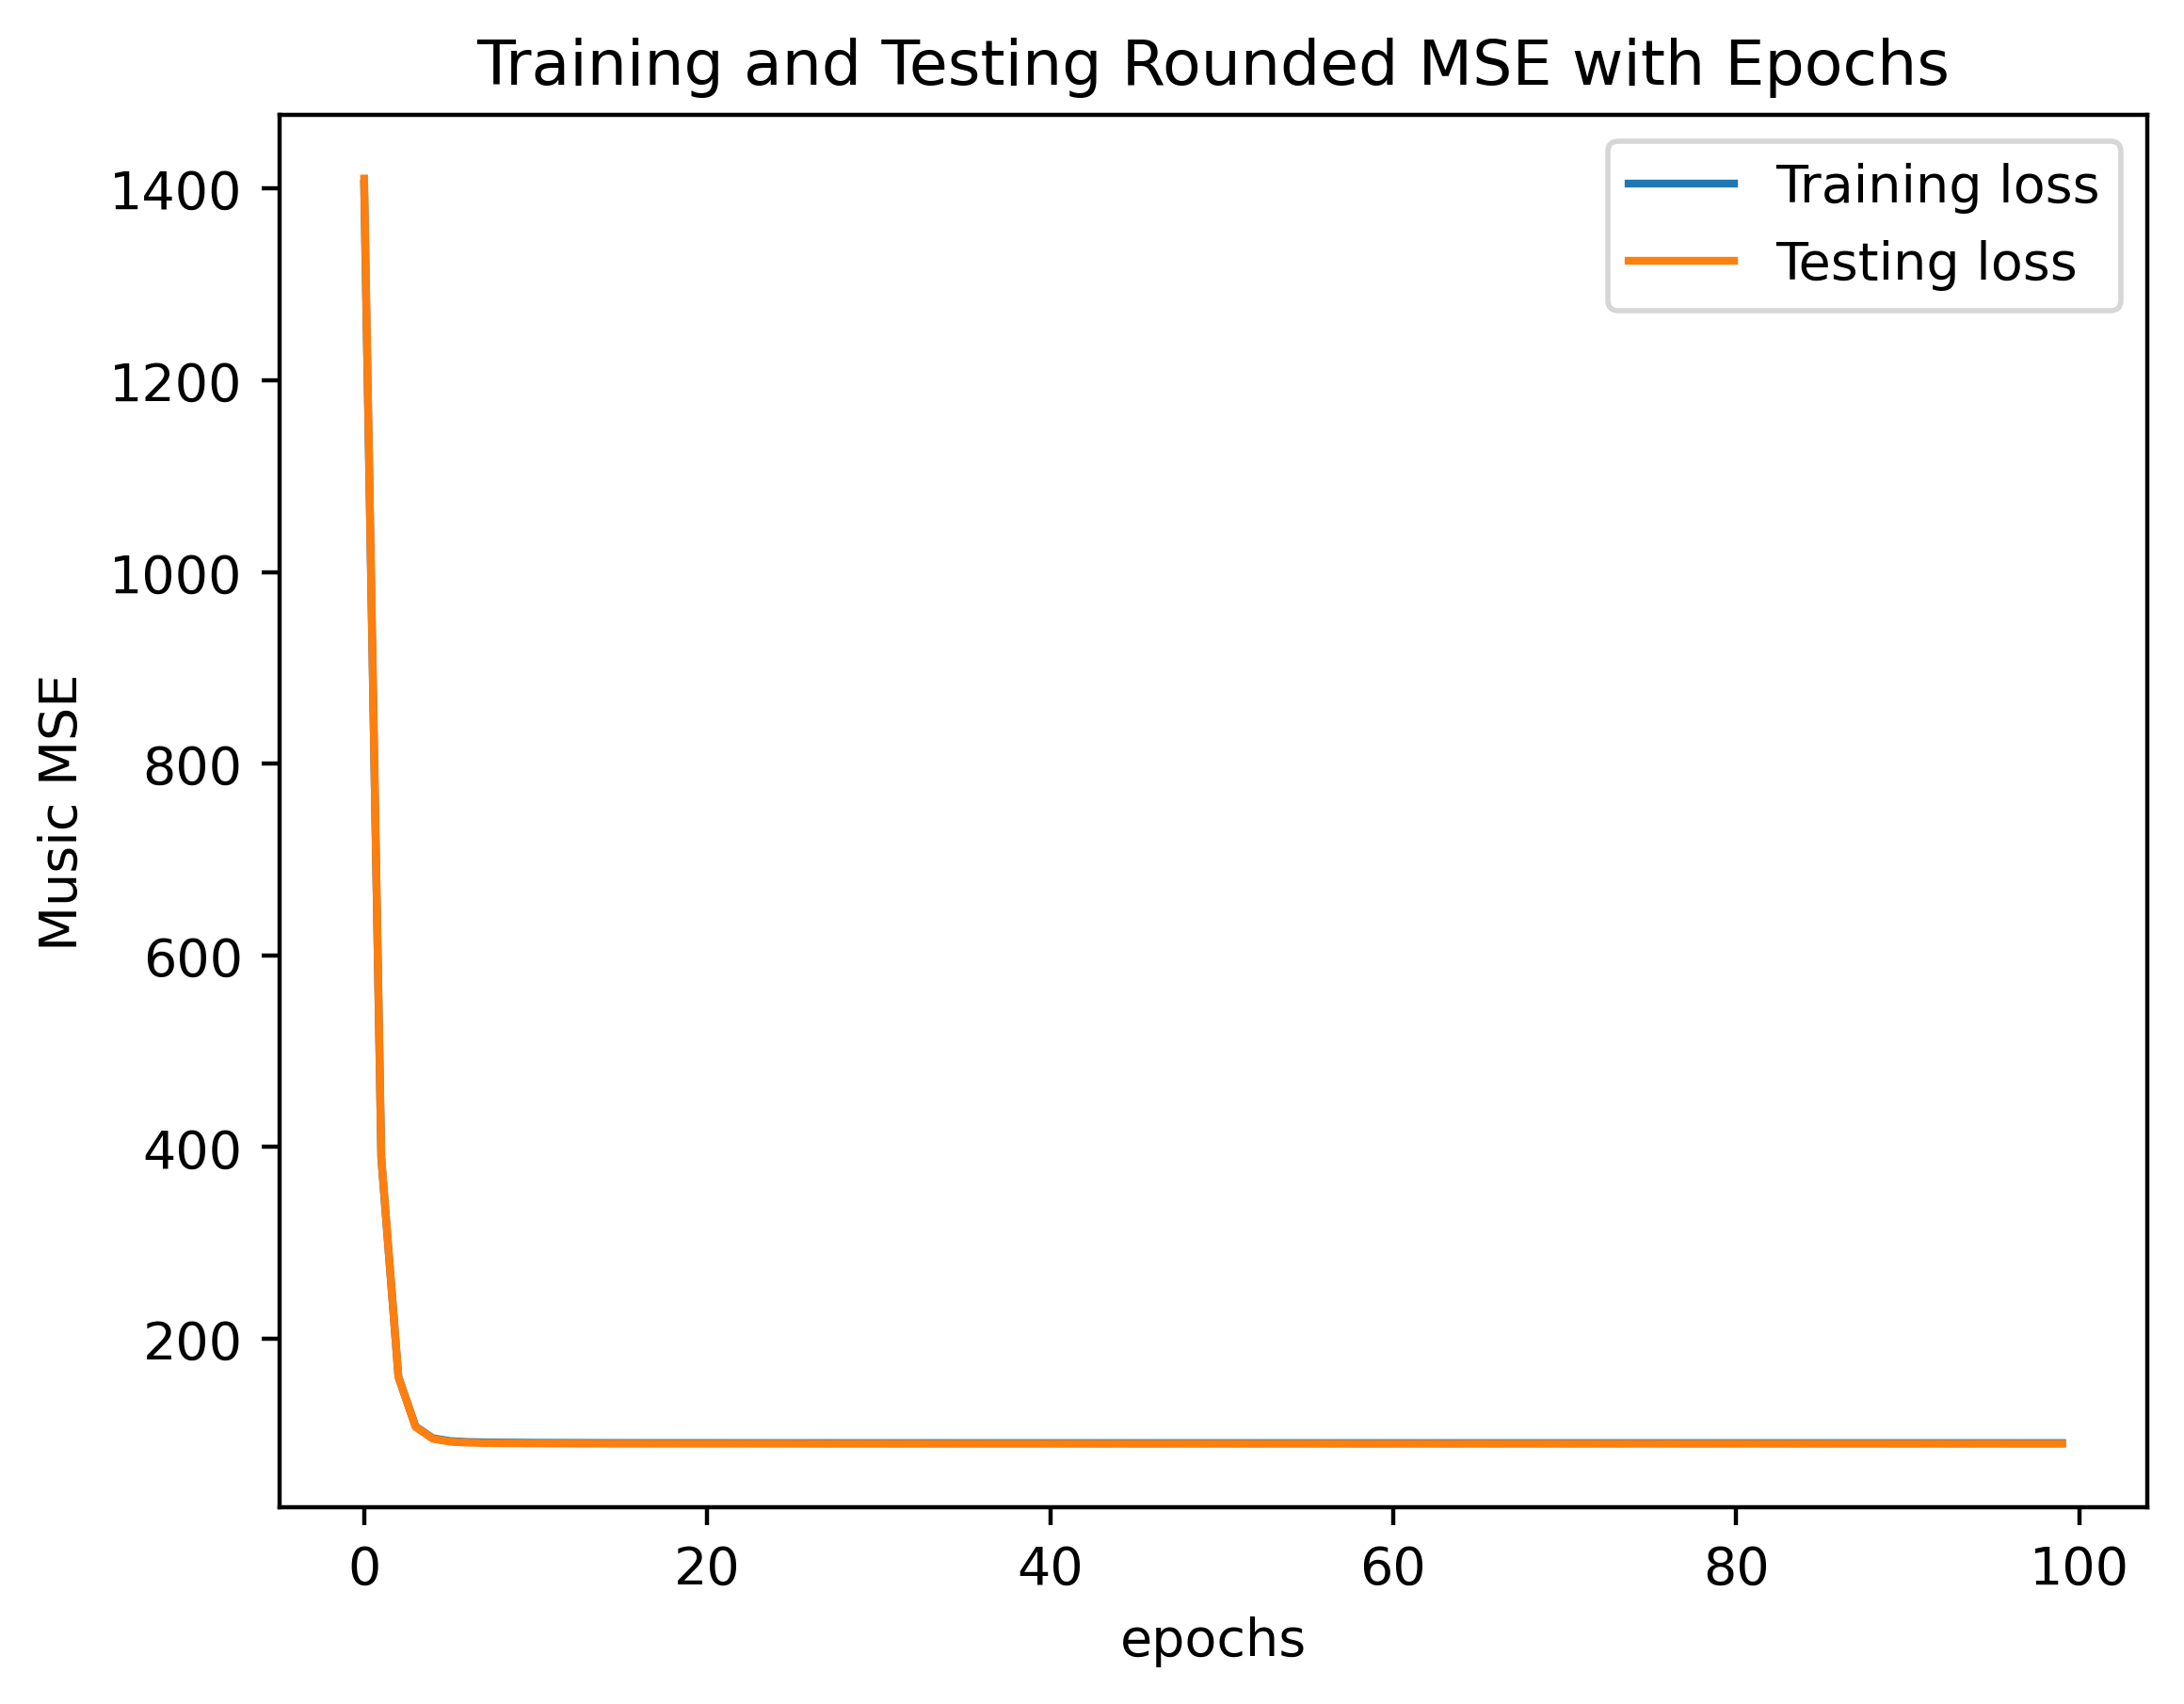

The test set MSE loss is 90.55517034339834


In [21]:
tune_parameter(lr,batch_size,lambda_lst, train_x, train_y)
best_model = RidgeRegression(learning_rate=0.01, epochs = 100,
batch_size = 10000, alpha = 0.3)
best_model.fit(train_x, train_y, test_x, test_y)
best_model.plot_cost()
print("The test set MSE loss is %s"%best_model.test_loss[-1])

In [22]:
from numpy.linalg import inv
stack = np.hstack((train_x,train_y))
idx = np.random.randint(len(train_x), size=15000)
train_x_selected = stack[idx, :-1]
train_y_selected = stack[idx, -1].reshape(15000, 1)
a1 = train_x_selected.dot(train_x_selected.T)+0.3 * np.identity(len(train_x_selected))
a2 = inv(a1).dot(train_y_selected)
a3 = train_x_selected.T.dot(a2)
w = a3.T
predicted_test = test_x.dot(w.T )
print("The test set loss is: %s"%(musicMSE(predicted_test,test_y)))

The test set loss is :91.17315178865411


### Part 4 - Implementing L1 Weight Decay 
Implement lasso regression using stochastic gradient descent with mini-batches. Tune the
learning rate and weight decay factor. Subsequently, show the train and test loss as a
function of epochs, where the number of epochs should be chosen to ensure the train loss
is minimized.

In [23]:
class LassoRegression:
    def __init__(self,learning_rate=0.01, epochs = 1000, batch_size = 1, alpha = 0):
        self.n = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.alpha = alpha
    def predict(self,X):
        return X.dot(self.weight.T )
    def fit(self, X, Y, X_test, Y_test):
        np.random.seed(1)
        self.n = X.shape[0]
        self.weight = np.random.normal(0, 0.01,(Y.shape[1], X.shape[1]-1))
        self.weight = np.insert( self.weight,0,0).reshape(1, X.shape[1])
        self.train_loss = []
        self.test_loss =[]
        self.delta_w = np.zeros((Y.shape[1], X.shape[1]))
        for loop in range(self.epochs):
            batches = create_mini_batches(X, Y, self.batch_size)
            for i in range(len(batches)-1):
                batch  = batches[i]
                cur_x = batch[0]
                cur_y = batch[1]
                predicted = self.predict(cur_x)
                self.delta_w = (2 * (cur_x.dot(self.weight.T) - cur_y).T.dot (cur_x)  +  self.alpha* ((self.weight+1e-8) / np.absolute(self.weight+1e-8)/self.batch_size))
            self.weight -=  self.learning_rate* self.delta_w
            predict_train = self.predict(X)
            self.train_loss.append(musicMSE(predict_train, Y))
            predict_test = self.predict(X_test)
            self.test_loss.append(musicMSE(predict_test, Y_test))
    def plot_cost(self):
            plt.figure(dpi = 400)
            plt.plot(np.arange(len(self.train_loss)),self.train_loss,
            label = "Training loss")
            plt.plot(np.arange(len(self.test_loss)),self.test_loss,
            label = "Testing loss")
            plt.legend()
            plt.xlabel("epochs")
            plt.ylabel("Music MSE")
            plt.title("Training and Testing Rounded MSE with Epochs")
            plt.show()
    def create_mini_batches(X, y, batch_size):
        mini_batches = []
        data = np.hstack((X, y))
        np.random.shuffle(data)
        n_minibatches = data.shape[0] // batch_size
        for i in range(n_minibatches + 1):
            mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
            X_mini = mini_batch[:, :X.shape[1]]
            Y_mini = mini_batch[:, X.shape[1]:]
            mini_batches.append((X_mini, Y_mini))
        if data.shape[0] % batch_size != 0:
            mini_batch = data[i * batch_size:data.shape[0]]
            X_mini = mini_batch[:, :X.shape[1]]
            Y_mini = mini_batch[:, X.shape[1]:]
            mini_batches.append((X_mini, Y_mini))
        return mini_batches

In [ ]:
from sklearn.model_selection import train_test_split
lr = [0.01, 0.05, 0.1]
batch_size = [500,1000, 5000, 10000, 20000]
lambda_lst = [0, 0.1,0.5, 0.8]
def tune_Lasso_parameter(lr,batch_size,lambda_lst, train_x, train_y):
    #holdout 20% from the training as the development set
    train_x, develop_x,  train_y, develop_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
    print("train_x’s shape: " + str(train_x.shape))
    print("develop_x’s shape: " + str(develop_x.shape))
    print("train_y’s shape: " + str(train_y.shape))
    print("develop_y’s shape: " + str(develop_y.shape))
    best_comb = None
    best_develop_loss= 10000000
    for i in lr:
        for j in batch_size:
            for p in lambda_lst:
                ann = LassoRegression(learning_rate=i, epochs = 100,
                batch_size = j, alpha = p)
                ann.fit(train_x, train_y,develop_x, develop_y)
                cur_develop_loss = ann.test_loss[-1]
                print(cur_develop_loss)
                if cur_develop_loss < best_develop_loss:
                    best_develop_loss = cur_develop_loss
                    best_comb = [i,j, p]
    print("Best Hyperparameter combination:\nlearning rate = %s\nbatch size = %s\nlambda(L1 regularization parameter) = %s\nWith best development set loss = %s" %(best_comb[0],best_comb[1],best_comb[2],best_develop_loss))
   
    

train_x’s shape: (296776, 91)
develop_x’s shape: (74195, 91)
train_y’s shape: (296776, 1)
develop_y’s shape: (74195, 1)


/var/folders/87/6bfjhdg13952r0hbf93s28b40000gn/T/ipykernel_23817/3259173287.py:18: RuntimeWarning: overflow encountered in square
  mse = np.square(rounded_predictions - ground_truths).mean()


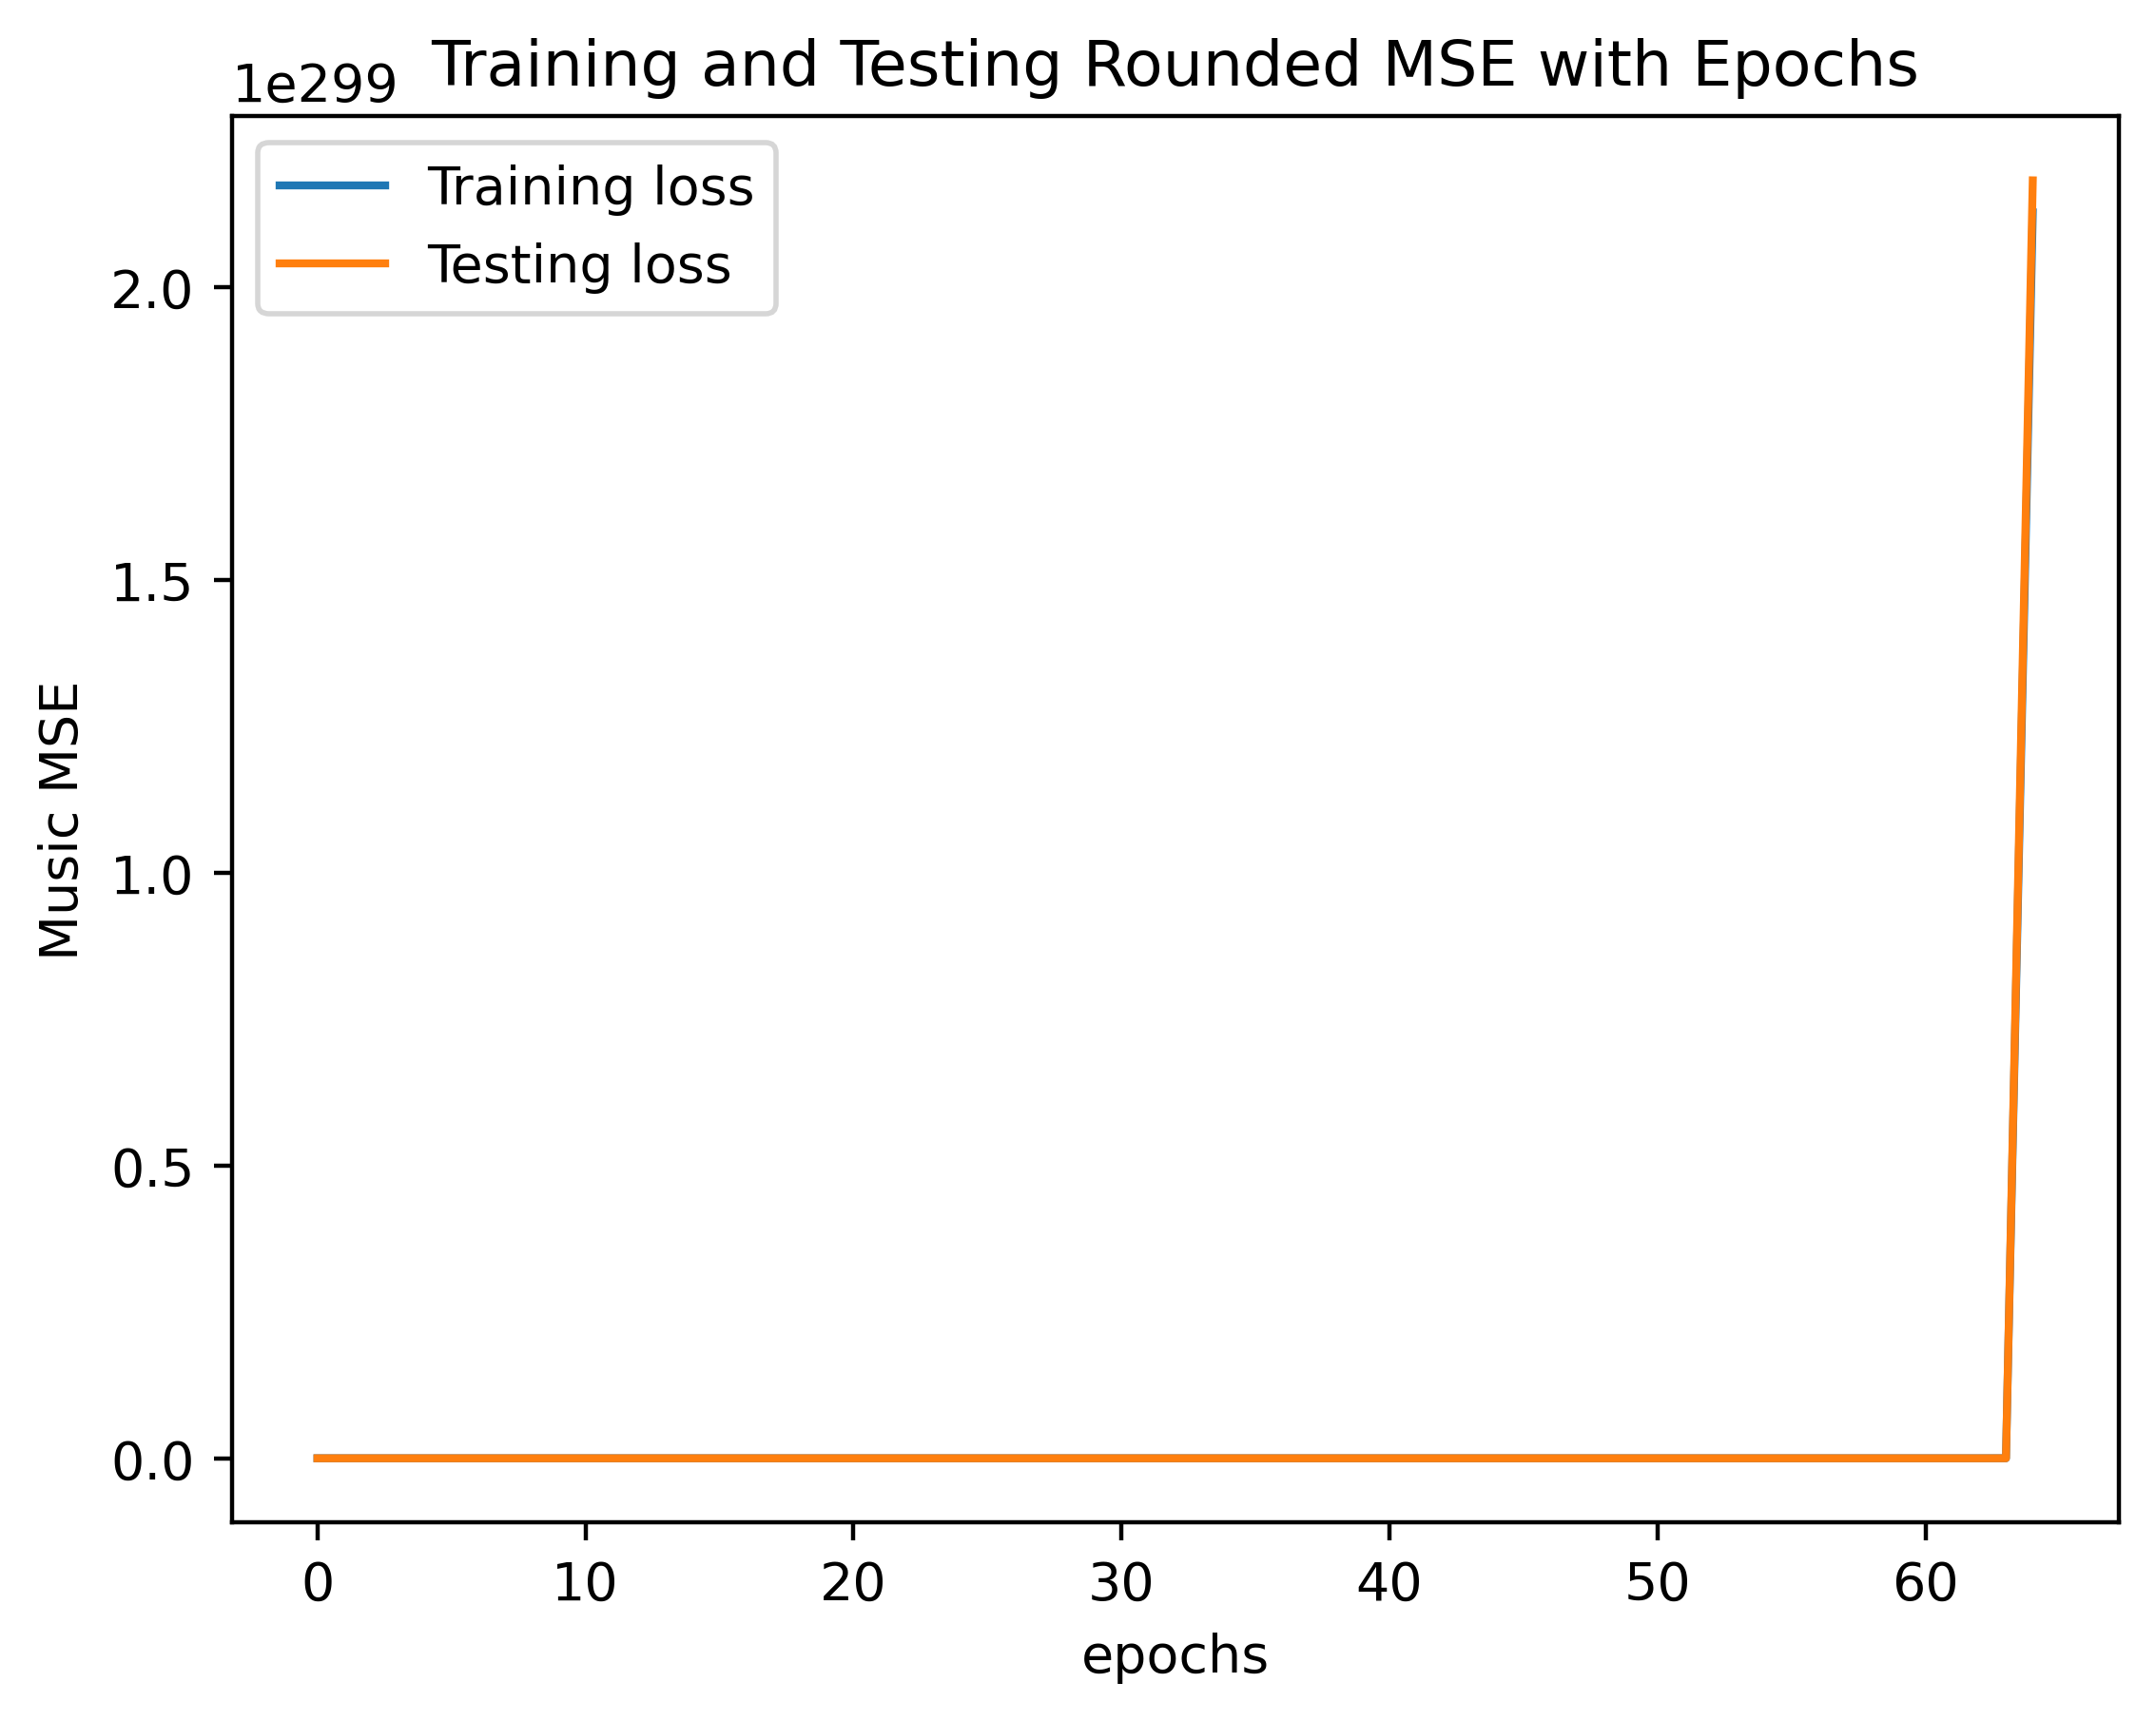

The test set MSE loss is inf


In [24]:
tune_parameter(lr,batch_size,lambda_lst, train_x, train_y)
best_lasso_model = LassoRegression(learning_rate=0.01, epochs = 100, batch_size = 10000, alpha = 0.3)
best_lasso_model.fit(train_x, train_y, test_x, test_y)
best_lasso_model.plot_cost()
print("The test set MSE loss is %s"%best_lasso_model.test_loss[-1])

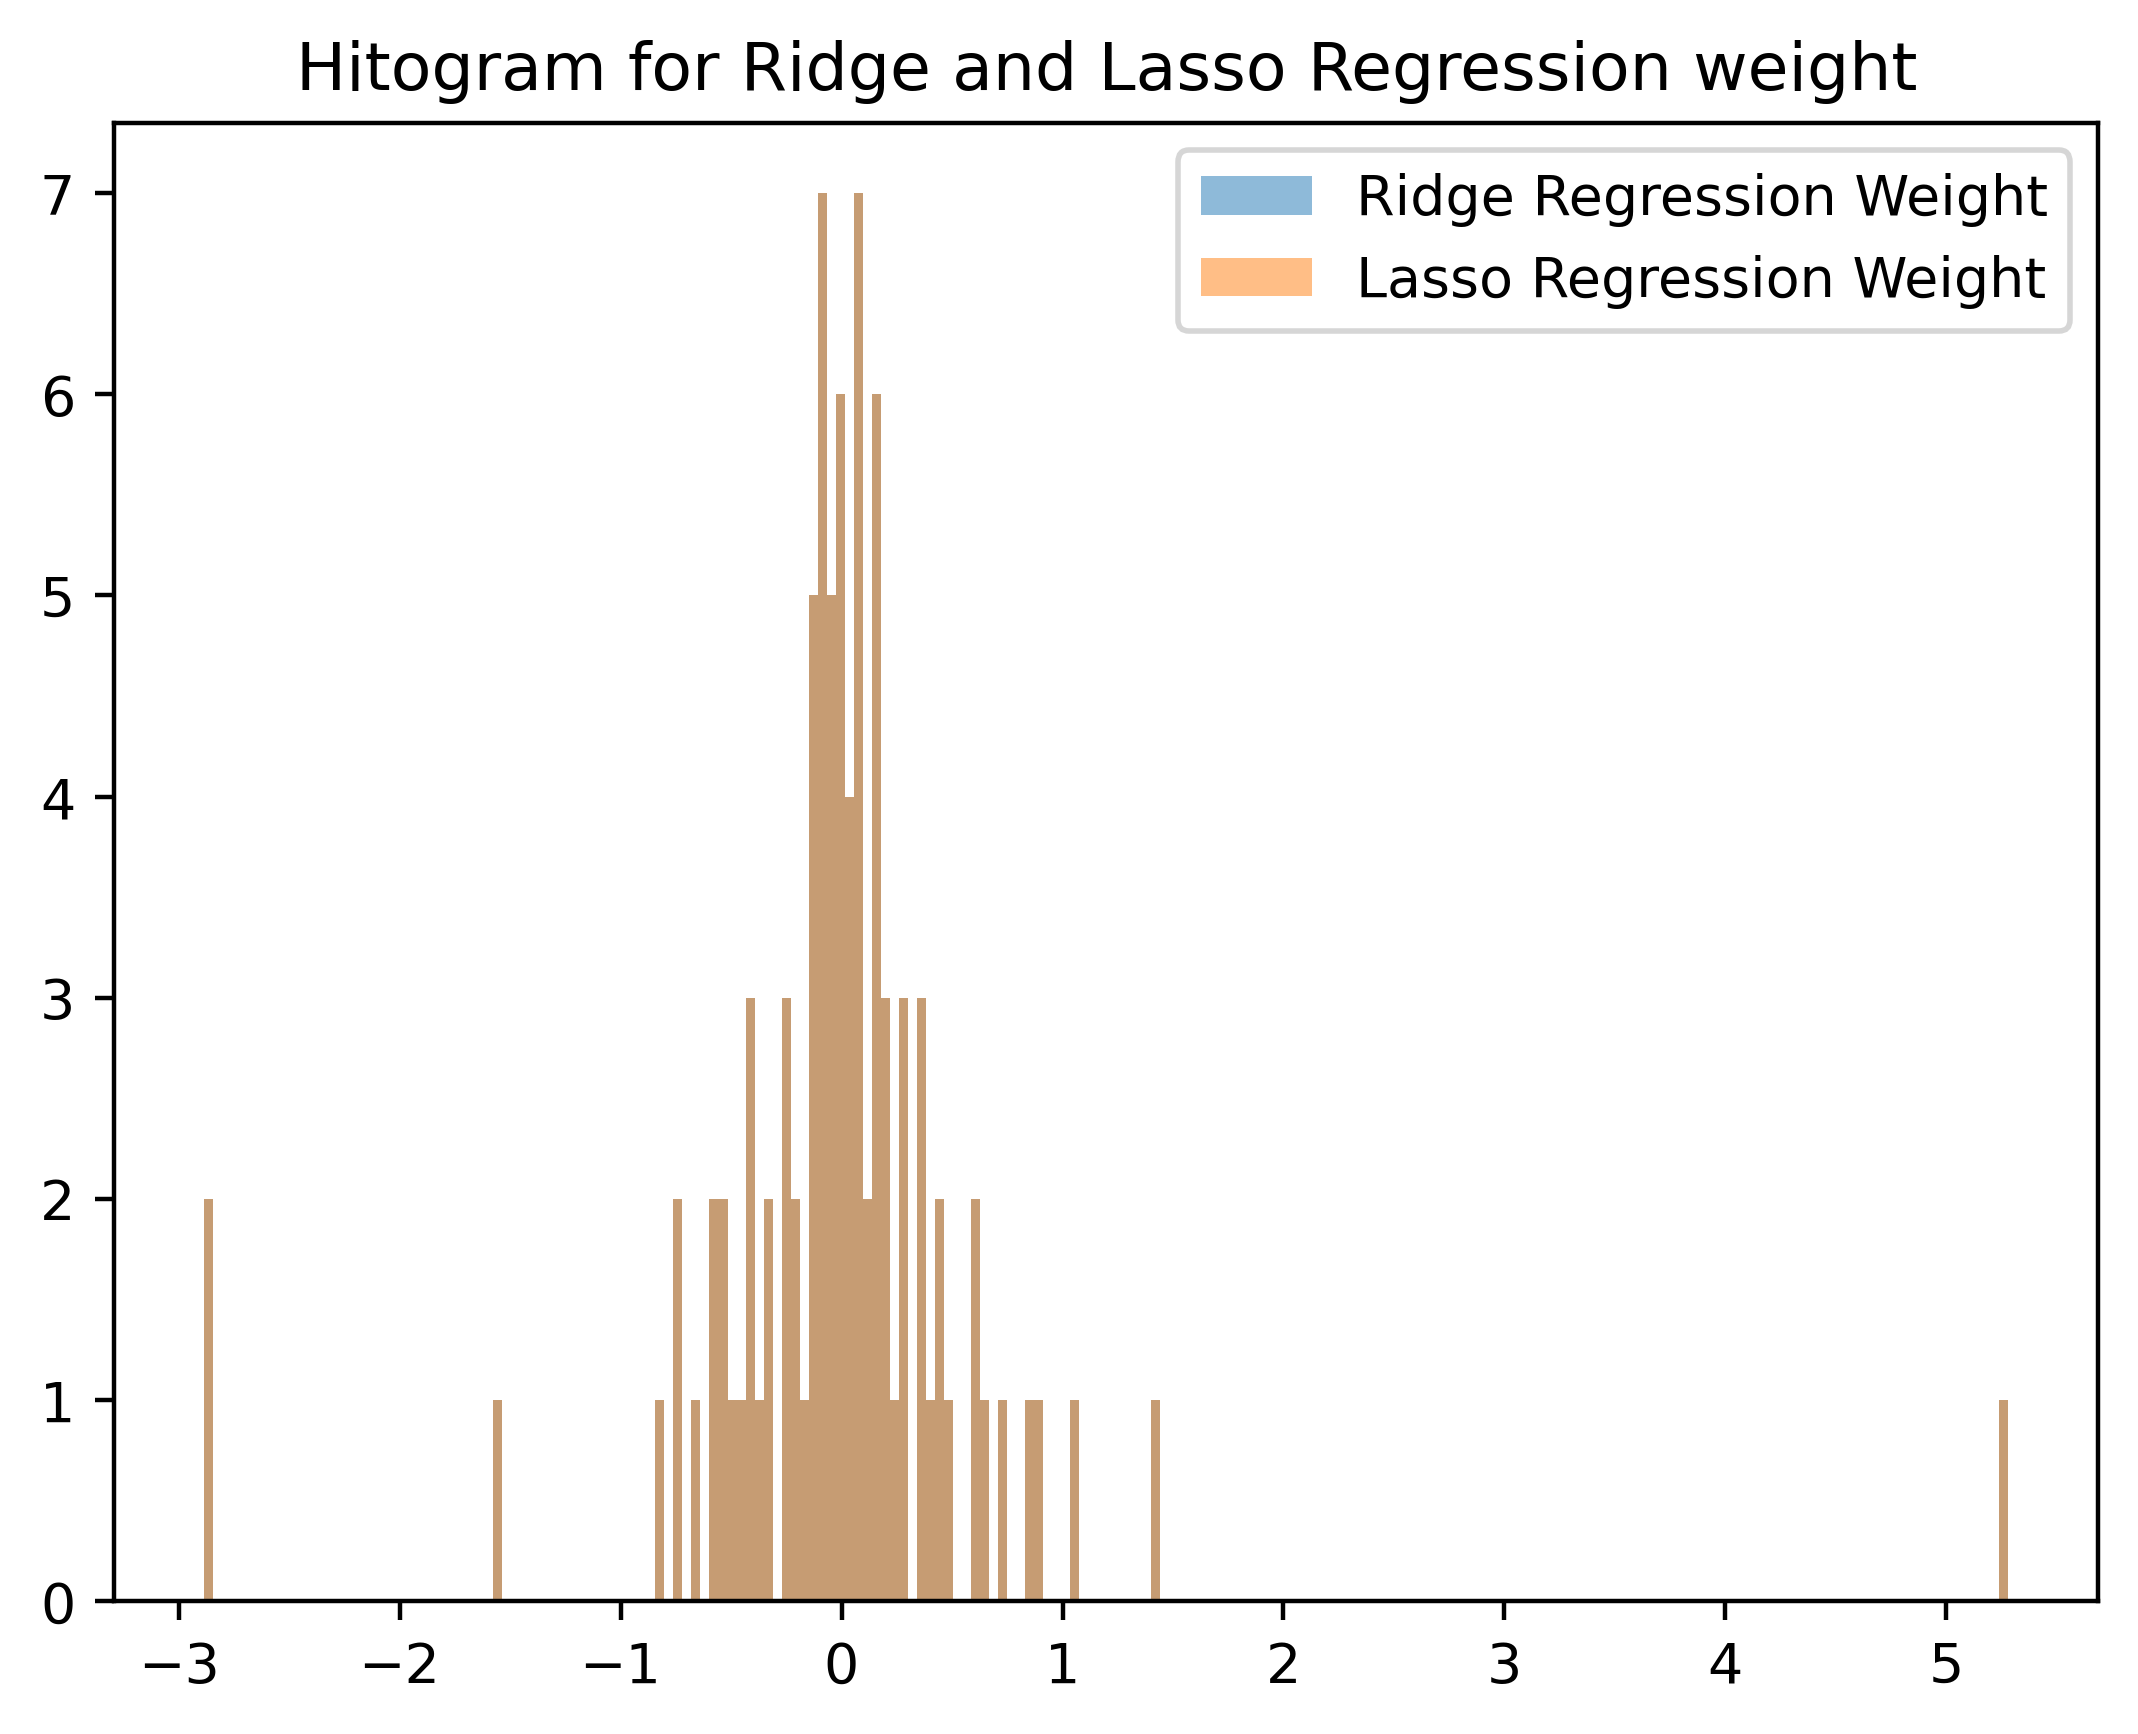

In [25]:
weight_l2 = best_model.weight[:,1:]
weight_l1 = best_lasso_model.weight[:,1:]
plt.figure(dpi = 400)
plt.hist(weight_l2.flatten(),bins = 200, label = "Ridge Regression Weight",alpha=0.5)
plt.hist(weight_l2.flatten(),bins = 200, label = "Lasso Regression Weight",alpha=0.5)
plt.title("Hitogram for Ridge and Lasso Regression weight")
plt.legend()
plt.show()

### Part 5 - Implementing Count Regression 

Implement count regression. Minimize the loss using SGD with mini-batches to find an
optimal w. Compute the gradient update rule and show it. Plot the train and test loss
as a function of epochs. Compute the train and test MSE using the function we created
earlier.

In [26]:
class PoissonRegression:
    def __init__(self,learning_rate=0.01, epochs = 1000, batch_size = 1):
        self.n = 0
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
    def predict(self,X):
        return np.exp(X.dot(self.weight.T ))
    def fit(self, X, Y, X_test, Y_test):
        np.random.seed(1)
        self.n = X.shape[0]
        self.weight = np.random.normal(0, 0.01, (Y.shape[1], (X.shape[1]-1) ))
        self.weight = np.insert( self.weight,0,0).reshape(1, X.shape[1])
        self.train_loss = []
        self.test_loss =[]
        self.delta_w = np.zeros((Y.shape[1], X.shape[1]))
        for loop in range(self.epochs):
            batches = create_mini_batches(X, Y, self.batch_size)
            for i in range(len(batches)-1):
                batch  = batches[i]
                cur_x = batch[0]
                cur_y = batch[1]
                predicted = self.predict(cur_x)
                self.delta_w =   cur_x.T.dot(np.exp(cur_x.dot(self.weight.T))
                - cur_y)/self.n
                self.weight -=  self.learning_rate* self.delta_w.T
            predict_train = self.predict(X)
            self.train_loss.append(musicMSE(predict_train, Y))
            predict_test = self.predict(X_test)
            self.test_loss.append(musicMSE(predict_test, Y_test))
    def plot_cost(self):
            plt.figure(dpi = 400)
            plt.plot(np.arange(len(self.train_loss)),self.train_loss,
            label = "Training loss")
            plt.plot(np.arange(len(self.test_loss)),self.test_loss,
            label = "Testing loss")
            plt.legend()
            plt.xlabel("epochs")
            plt.ylabel("Music MSE")
            plt.title("Training and Testing Rounded MSE with Epochs")
            plt.show()
    def create_mini_batches(X, y, batch_size):
            mini_batches = []
            data = np.hstack((X, y))
            np.random.shuffle(data)
            n_minibatches = data.shape[0] // batch_size
            for i in range(n_minibatches + 1):
                mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
                X_mini = mini_batch[:, :X.shape[1]]
                Y_mini = mini_batch[:, X.shape[1]:]
                mini_batches.append((X_mini, Y_mini))
            if data.shape[0] % batch_size != 0:
                mini_batch = data[i * batch_size:data.shape[0]]
                X_mini = mini_batch[:, :X.shape[1]]
                Y_mini = mini_batch[:, X.shape[1]:]
                mini_batches.append((X_mini, Y_mini))
            return mini_batches

In [27]:
from sklearn.model_selection import train_test_split
lr = [0.001,0.01,  0.05, 0.1]
batch_size = [500,1000, 5000, 10000, 20000]
def tune_Poisson_parameter(lr,batch_size, train_x, train_y):
    train_x, develop_x,  train_y, develop_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
    print("train_x’s shape: " + str(train_x.shape))
    print("develop_x’s shape: " + str(develop_x.shape))
    print("train_y’s shape: " + str(train_y.shape))
    print("develop_y’s shape: " + str(develop_y.shape))
    best_comb = None
best_develop_loss= 10000000
for i in lr:
    for j in batch_size:
        ann = PoissonRegression(learning_rate=i, epochs = 100, batch_size = j)
        ann.fit(train_x, train_y,develop_x, develop_y)
        cur_develop_loss = ann.test_loss[-1]
        print(cur_develop_loss)
        if cur_develop_loss < best_develop_loss:
            best_develop_loss = cur_develop_loss
            best_comb = [i,j]
print("Best Hyperparameter combination:\nlearning rate = %s\nbatch size = %s \nWith best development set loss = %s"%(best_comb[0],best_comb[1],best_develop_loss))

In [ ]:
tune_Poisson_parameter(lr,batch_size, train_x, train_y)
best_model = PoissonRegression(learning_rate=0.001, epochs = 100, batch_size = 20000)
best_model.fit(train_x, train_y, test_x, test_y)
best_model.plot_cost()
print("The music MSE loss on the training set is %s"%(best_model.train_loss[-1]))
print("The music MSE loss on the testing set is %s"%(best_model.test_loss[-1]))

### Part 6: Model Comparison 
Plot a histogram of the weights for the ridge, lasso, and count regression models. Discuss
how the weights differ.<br>
<br>Discuss and compare the behaviors of the models. Are there certain periods (ranges of
years) in which models perform better than others? Where are the largest errors across
models. Did regularization help for some models but not others?

trainYears, trainFeat, testYears, testFeat = loadMusicData("YearPredictionMSD.txt",
addBias = False)
train_x_class, train_y_class, test_x_class, test_y_class, label_array_class = sk. pre_process_softmax_data(trainFeat,trainYears,  testFeat, testYears)
lr = [0.01, 0.05, 0.1]
batch_size =  [1000, 5000, 10000, 20000]
momentum = [0,0.3, 0.5]
lambda_lst = [ 0.1, 0.5, 0.8]
def tune_softmax_parameter(lr,
batch_size,momentum,lambda_lst, train_x, train_y):
    #holdout 20% from the training as the development set
    train_x, develop_x,  train_y, develop_y = train_test_split(train_x, train_y,
    test_size=0.2, random_state=42)
    print("train_x’s shape: " + str(train_x.shape))
    print("develop_x’s shape: " + str(develop_x.shape))
    print("train_y’s shape: " + str(train_y.shape))
    print("develop_y’s shape: " + str(develop_y.shape))
    best_comb = None
    best_develop_accuracy = 0

for i in lr:
        for j in batch_size:
            for l in momentum:
                for p in lambda_lst:
                    ann = SoftmaxClassifier(learning_rate=i, n_iterations=1000,
                    batch_size = j, lamdba =p, momentum =l)
                    ann.fit(train_x, train_y,develop_x, develop_y)
                    cur_develop_accuracy = ann.test_accuracy[-1]
                    print(cur_develop_accuracy)
                    if cur_develop_accuracy >best_develop_accuracy:
                        best_develop_accuracy = cur_develop_accuracy
                        best_comb = [i,j,l, p]
print("Best Hyperparameter combination:\nlearning rate = %s\nbatch size = %s\nmomentum = %s\nlambda(L2 regularization parameter) = %s\nWith best average per-class accuracy on development = %s"%(best_comb[0],best_comb[1],best_comb[2],best_comb[3],best_develop_accuracy))
tune_softmax_parameter(lr,batch_size,momentum,lambda_lst, train_x_class, train_y_class)
best_softmax_model = SoftmaxClassifier( learning_rate=0.01, n_iterations=1000,
batch_size = 10000, lamdba =0.5, momentum =0.5)
best_softmax_model.fit(train_x_class, train_y_class,test_x_class, test_y_class)
train_predicted_index = best_softmax_model.predict(train_x_class)
predicted_train_y =label_array_class[train_predicted_index]
test_predicted_index = best_softmax_model.predict(test_x_class)
predicted_test_y =label_array_class[test_predicted_index]
print(musicMSE(predicted_train_y, trainYears.flatten()))
print(musicMSE(predicted_test_y, testYears.flatten()))
best_softmax_model.plot_cost_accuracy()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def confusion_matrix_plot(name, trained_model, x_test, x_test_class, y_test):
    if name == "Softmax Classifier":
        y_pred = label_array_class[trained_model.predict(test_x_class)]
    else:
        y_pred = np.rint(trained_model.predict(x_test)) + np.min(all_label)
    cf_matrix = confusion_matrix(testYears.flatten(), y_pred, normalize = 'true')
    label_array_true = np.unique(y_test)+ np.min(all_label)
    total_label = np.unique(np.append(y_pred,y_test))
    df_cm = pd.DataFrame(cf_matrix ,index = total_label,
                      columns = total_label)
    mask = np.isin(total_label, label_array_true)
    chosem_cm = df_cm.values[mask, :][:,mask]
    #calculate the per-class accuracy
    plt.figure(dpi = 400)
    class_accuracy = []
    print(label_array_true)
    for i in range(len(label_array_true )):
        class_accuracy.append(chosem_cm[i][i])
    plt.bar(label_array_true,np.array(class_accuracy))
    plt.xlabel("True Label")
    plt.ylabel("Accuracy rate")
    plt.title("Per-class Accuracy on Test dataset using %s"%(name))
    plt.show()
    return class_accuracy
confusion_matrix_plot("Softmax Classifier", best_softmax_model, test_x, test_x_class, test_x
confusion_matrix_plot("Ridge Regression Rounded", best_ridge_model, test_x, test_x_class,te
confusion_matrix_plot("Lasso Regression Rounded", best_lasso_model, test_x, test_x_class,te
confusion_matrix_plot("Poisson Regression Rounded", best_poisson_model,  test_x, test_x_cla


## Problem 5: Softmax Properties

### Part 1: 

Recall the softmax function, which is the most common activation function used for the
output of a neural network trained to do classification. In a vectorized form, it is given
by<br>
<br> softmax (a) = <br>
<br>where a ∈R<sup>K</sup> . The exp function in the numerator is applied element-wise and aj denotes
the j’th element of a.<br>

<br>Show that the softmax function is invariant to constant offsets to its input, i.e.,
softmax (a + c1) = softmax (a) ,
where c ∈Ris some constant and 1 denotes a column vector of 1’s.

<b> Solution: </b>

### Part 2:
In practice, why is the observation that the softmax function is invariant to constant offsets
to its input important when implementing it in a neural network?

<b> Solution: </b>

## Problem 6: Implementing a Softmax Classifier
For this problem, you will use the 2-dimensional Iris dataset. Download iris-train.txt
and iris-test.txt from Canvas. Each row is one data instance. The first column is the
label (1, 2 or 3) and the next two columns are features.<br>
<br>Write a function to load the data and the labels, which are returned as NumPy arrays.

### Part 1:Implementation & Evaluation 
Recall that a softmax classifier is a shallow one-layer neural network of the form:

<br>where x is the vector of inputs, K is the total number of categories, and wk is the weight
vector for category k. The bias has been omitted, but you can incorporate it by appending
a ‘1’ to each x.<br>
<br>In this problem you will implement a softmax classifier from scratch. Do not use a
toolbox. Use the softmax (cross-entropy) loss with L2 weight decay regularization. Your
implementation should use stochastic gradient descent with mini-batches and momentum
to minimize softmax (cross-entropy) loss of this single layer neural network. To make your
implementation fast, do as much as possible using matrix and vector operations. This will
allow your code to use your environment’s BLAS. Your code should loop over epochs and
mini-batches, but do not iterate over individual elements of vectors and matrices. Try
to make your code as fast as possible. I suggest using profiling and timing tools to do
this.<br>
<br>Train your classifier on the Iris dataset for 1000 epochs. You should either subtract the
mean of the training features from the train and test data or normalize the features to be
between -1 and 1 (instead of 0 and 1). Initialize your weights from a Gaussian distribution
Hand tune the hyperparameters (i.e., learning rate, mini-batch size, momentum rate, and
L2 weight decay factor) to achieve the best possible training accuracy. During a training
epoch, your code should compute the mean per-class accuracy for the training data and
the loss. After each epoch, compute the mean per-class accuracy for the testing data and
the loss as well. The test data should not be used for updating the weights.<br>
<br>After you have tuned the hyperparameters, generate two plots next to each other. The one
on the left should show the cross-entropy loss during training for both the train and test
sets as a function of the number of training epochs. The plot on the right should show the
mean per-class accuracy as a function of the number of training epochs on both the train
set and the test set.<br>
<br>What is the best test accuracy your model achieved? What hyperparameters did you use?<br>
<br>Would early stopping have helped improve accuracy on the test data?<br>

In [76]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
class SoftmaxClassifier:
    def __init__(self, learning_rate=0.01, n_iterations=2500,
    batch_size = 1,lamdba  = 0,momentum = 0):
        self.parameters = {}
        self.n = 0
        self.learning_rate= learning_rate
        self.epoch = n_iterations
        self.batch_size = batch_size
        self.momentum = momentum
        self.l2_regularization = lamdba
    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0, keepdims=True)
    def fit(self, X, Y, X_test, Y_test):
        np.random.seed(1)
        self.n = X.shape[0]
        self.weight = np.random.normal(0, 0.01,(Y.shape[1], X.shape[1]-1))
        self.weight = np.insert(self.weight, 0, 0, axis=1)
        self.train_entropy_loss = []
        self.test_entropy_loss =[]
        self.train_accuracy =[]
        self.test_accuracy =[]
        self.delta_w = np.zeros((Y.shape[1], X.shape[1]))
        for loop in range(self.epoch):
            batches = create_mini_batches(X, Y,self.batch_size)
            for i in range(len(batches)-1):
                batch  = batches[i]
                cur_x = batch[0]
                cur_y = batch[1]
            cur_predicted = self.softmax(self.weight.dot(cur_x.T))
            derivative_entropy = (cur_predicted - cur_y.T).dot(cur_x) / self.batch_size
            derivative_regularization = 2* self.l2_regularization * self.weight/ self.batch_size
            self.delta_w =  self.learning_rate *(derivative_entropy +
            derivative_regularization) + self.momentum*self.delta_w
            self.weight -=  self.delta_w
        A_train = self.softmax(self.weight.dot(X.T))
        self.train_entropy_loss.append(-np.mean(Y * np.log(A_train.T+ 1e-8)))
        A_test = self.softmax(self.weight.dot(X_test.T))
        self.test_entropy_loss.append(-np.mean(Y_test * np.log(A_test.T+ 1e-8)))
        self.train_accuracy.append(self.mean_per_class_accuracy(X, Y))
        self.test_accuracy.append(self.mean_per_class_accuracy(X_test, Y_test))
def predict(self,X):
    predicted =self.softmax(self.weight.dot(X.T))
    return np.argmax(predicted, axis=0)
def mean_per_class_accuracy(self,X, Y):
    y_hat = self.predict(X)
    Y = np.argmax(Y, axis=1)
    label_collection = np.unique(Y)
    accu_collection = []
    for i in label_collection:
        indice = np.where(Y == i)
        cur_accu = len(np.where(y_hat[indice] == i)[0]) / len(indice[0])
        accu_collection.append(cur_accu)
    return np.mean(np.array(accu_collection)) #return a scalar
def plot_cost_accuracy(self):
    fig, ax = plt.subplots(1, 2, figsize= (15,8), dpi = 400)
    ax[0].plot(np.arange(len(self.train_entropy_loss)),self.train_entropy_loss,
    label = "Training cross-entropy loss")
    ax[0].plot(np.arange(len(self.test_entropy_loss)),self.test_entropy_loss,
    label = "Testing cross-entropy loss")
    ax[0].legend()
    ax[0].set_xlabel("epochs")
    ax[0].set_ylabel("cross-entropy loss")
    ax[0].set_title("Training and Testing cross-entropy loss with Epochs")
    ax[1].plot(np.arange(len(self.train_accuracy)),  self.train_accuracy,
    label = "Training average per-class accuracy")
    ax[1].plot(np.arange(len(self.test_accuracy)),  self.test_accuracy,
    label = "Testing average per-class accuracy")
    ax[1].legend()
    ax[1].set_title("Training and Testing average per-class accuracy with Epochs")
    ax[1].set_xlabel("epochs")
    ax[1].set_ylabel("average per-class accuracy")
    plt.show()
def pre_process_softmax_data(train_x, train_y, test_x, test_y):
    #Normalize in between -1 and 1, add bias
    #encode y
    all_feature = np.vstack((train_x,test_x))
    for i in range(all_feature.shape[1]):
        all_feature[:,i] = 2.*(all_feature[:,i] - np.min(all_feature[:,i]))
        /np.ptp(all_feature[:,i])-1
    bias_all_feature = np.insert(all_feature, 0, 1, axis=1)
    processed_train_x = bias_all_feature[:len(train_x)]
    processed_test_x = bias_all_feature[len(train_x):]
    enc = OneHotEncoder(sparse=False, categories='auto')
    train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))
    test_y = enc.transform(test_y.reshape(len(test_y), -1))
    label_array = enc.inverse_transform(test_y).ravel()
    return processed_train_x, train_y, processed_test_x, test_y, label_array
def create_mini_batches(X, y, batch_size):
        mini_batches = []
        data = np.hstack((X, y))
        np.random.shuffle(data)
        n_minibatches = data.shape[0] // batch_size
        for i in range(n_minibatches + 1):
            mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
            X_mini = mini_batch[:, :X.shape[1]]
            Y_mini = mini_batch[:, X.shape[1]:]
            mini_batches.append((X_mini, Y_mini))
        if data.shape[0] % batch_size != 0:
            mini_batch = data[i * batch_size:data.shape[0]]
            X_mini = mini_batch[:, :X.shape[1]]
            Y_mini = mini_batch[:, X.shape[1]:]
            mini_batches.append((X_mini, Y_mini))
        return mini_batches


<>:100: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:100: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?


FileNotFoundError: [Errno 2] No such file or directory: 'iris-train.txt'

In [ ]:
from sklearn.model_selection import train_test_split
lr = [0.001, 0.01, 0.05, 0.1]
batch_size = [10,30, 50, 72]
momentum = [0, 0.1, 0.3, 0.5, 0.8]
lambda_lst = [0, 0.01, 0.1, 0.3, 0.5, 0.8]
def tune_parameter(lr,batch_size,momentum,lambda_lst, train_x, train_y):
    #holdout 20% from the training as the development set
    train_x, develop_x,  train_y, develop_y = train_test_split(train_x,
    train_y, test_size=0.2, random_state=42)
    print("train_x’s shape: " + str(train_x.shape))
    print("develop_x’s shape: " + str(develop_x.shape))
    print("train_y’s shape: " + str(train_y.shape))
    print("develop_y’s shape: " + str(develop_y.shape))
    best_comb = None
    best_develop_accuracy = 0
    for i in lr:
        for j in batch_size:
            for l in momentum:
                for p in lambda_lst:
                    ann = SoftmaxClassifier(learning_rate=i, n_iterations=1000,
                    batch_size = j, lamdba =p, momentum =l)
                    ann.fit(train_x, train_y,develop_x, develop_y)
                    cur_develop_accuracy = ann.test_accuracy[-1]
                    print(cur_develop_accuracy)
                    if cur_develop_accuracy > best_develop_accuracy:
                        best_develop_accuracy = cur_develop_accuracy
                        best_comb = [i,j,l, p]
    print("Best Hyperparameter combination:\nlearning rate = %s\nbatch size = %s\nmomentum%s\nlambda(L2 regularization parameter) = %s\nWith best average per-class accuracy on d %s"%(best_comb[0],best_comb[1],best_comb[2],best_comb[3],best_develop_accuracy))

In [ ]:
train_data = load_data("iris-train.txt")
test_data = load_data("iris-test.txt")
train_x, train_y, test_x, test_y,label_array = pre_process_softmax_data(train_data[:,1:],
train_data[:,0].astype("int"), test_data[:,1:], test_data[:,0].astype("int"))
tune_parameter(lr,batch_size,momentum,lambda_lst,train_x, train_y)

### Part 2: Displaying Decision Boundaries 
Plot the decision boundaries learned by softmax classifier on the Iris dataset, just like we
saw in class. On top of the decision boundaries, generate a scatter plot of the training
data. Make sure to label the categories.

In [ ]:
def plot_graph(train_data,test_data):
    plt.figure(dpi = 400)
    # Plot the decision boundary. For that, we will assign a color to each
    cdict = {1: 'red', 2: 'blue', 3: 'green'}
    ann = SoftmaxClassifier()
    train_x, train_y, test_x, test_y, labels = pre_process_softmax_data(
    train_data[:,1:],train_data[:,0].astype("int"), test_data[:,1:],
    test_data[:,0].astype("int"))
    ann = SoftmaxClassifier(learning_rate=0.01, n_iterations=1000,
    batch_size = 10, lamdba =0, momentum = 0.5)
    ann.fit(train_x, train_y,test_x, test_y)
    min1, max1 = train_x[:, 0].min()-1, train_x[:, 0].max()+1
    min2, max2 = train_x[:, 1].min()-1, train_x[:, 1].max()+1
    x1grid = np.arange(min1, max1, 0.01)
    x2grid = np.arange(min2, max2, 0.01)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1,r2))
    bias_grid = np.insert(grid, 0, 1, axis=1)
    yhat = ann.predict(bias_grid) +1
    zz = yhat.reshape(xx.shape)
    plt.contour(xx, yy, zz)
    for g in np.unique(train_data[:,0]):
        ix = np.where(train_data[:,0] == g)
        plt.scatter(train_x[ix,1],train_x[ix,2], c = cdict[g],
        label = "class "+str(int(g)), s = 10)
    plt.title("Decision boundary and Scatter Plot")
    plt.legend()
    plt.show()
plot_graph(train_data, test_data)

## Problem 7: Classifying Images
Recall the CIFAR-10 dataset from Homework 0. Using the softmax classifier you imple-
mented, train the model on CIFAR-10’s training partitions. To do this, you will need
to treat each image as a vector. You will need to tweak the hyperparmaters you used
earlier.<br>
<br>Plot the training loss as a function of training epochs. Try to minimize the error as much
as possible. What were the best hyperparmeters? Output the final test accuracy and a
normalized 10 ×10 confusion matrix computed on the test partition. Make sure to label
the columns and rows of the confusion matrix.<br>

In [57]:
import pickle
import sklearn as sk
def pre_process_image_data(train_x, train_y, test_x, test_y):
    # Normalize in between -1 and 1
    train_x = ((train_x/255)-0.5)*2
    test_x = ((test_x/255)-0.5)*2
    # encode the y label to have shape N X (# of classes)
    enc = OneHotEncoder(sparse=False, categories='auto')
    train_y = enc.fit_transform(train_y.reshape(len(train_y), -1))
    test_y = enc.transform(test_y.reshape(len(test_y), -1))
    return train_x, train_y, test_x, test_y

np.seterr(divide='ignore', invalid='ignore')
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
data_dic = unpickle("data_batch_1")
test_dic= unpickle("test_batch")
train_x = np.array(data_dic[b'data'])
test_x = np.array(test_dic[b'data'])
train_y = np.array(data_dic[b'labels'])
test_y = np.array(test_dic[b'labels'])
train_x, train_y, test_x, test_y=pre_process_image_data(train_x, train_y,
test_x, test_y)
lr = [0.005, 0.01, 0.05, 0.1]
batch_size = [100, 1000,5000, 8000]
momentum = [0, 0.5,0.9]
lambda_lst = [ 0.1, 0.5, 0.8]
tune_parameter(lr,batch_size,momentum,lambda_lst, train_x, train_y)
model_best = SoftmaxClassifier(learning_rate=0.05, n_iterations=1000,
batch_size = 5000, lamdba =0.1, momentum =0.5)
model_best.fit(train_x, train_y,test_x, test_y)
plt.figure(dpi = 400)
plt.plot(np.arange(len(model_best.train_entropy_loss)),
model_best.train_entropy_loss)
plt.title("Training cross-entropy loss with epoch")
plt.show()
print("Test dataset average per-class accuracy:%s"%(model_best.test_accuracy[-1]))


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


FileNotFoundError: [Errno 2] No such file or directory: 'data_batch_1'

In [60]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
y = np.argmax(test_y, axis=1)
y_pred = model_best.predict(test_x)
cf_matrix = confusion_matrix(y, y_pred, normalize = 'true')
df_cm = pd.DataFrame(cf_matrix ,index = [i for i in range(1,11)],
                  columns = [i for i in range(1,11)])
plt.figure(figsize = (10,7), dpi = 400)
ax = plt.axes()
sn.heatmap(df_cm, ax = ax, annot=True, cmap="YlGnBu")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_title('Confusion Matrix on test dataset', fontsize = 25)
plt.show()

NameError: name 'test_y' is not defined